In [3]:
import json
import re #정규표현식

from konlpy.tag import Okt
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import pytagcloud
import webbrowser


In [11]:
def showGraph(wordInfo):
    font_loc = 'c:/windows/fonts/malgun.ttf'
    font_name= font_manager.FontProperties(fname=font_loc).get_name()
    matplotlib.rc('font', family=font_name)
    
    plt.xlabel('주요단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    sorted_dic_val = sorted(wordInfo.values(), reverse=True)
    sorted_dic_key = sorted(wordInfo, key=wordInfo.get, reverse=True)
    
    plt.bar(range(len(wordInfo)), sorted_dic_val, align='center')
    plt.xticks(range(len(wordInfo)), list(sorted_dic_key),rotation='70')
    
    plt.show()

In [5]:
def saveWordCloud(wordInfo, filename):
    taglist = pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)
    pytagcloud.create_tag_image(taglist, filename, size=(640,480), fontname='Korean', rectangular=False)
    webbrowser.open(filename)

In [21]:
def main():
    openFileName = 'data/jtbcnews_facebook_2016-10-01_2017-03-12.json'
    cloudImagePath = openFileName + '.jpg'
    
    read_file= open(openFileName,'r',encoding='utf-8').read()
    
    jsonData=json.loads(read_file)
    message=''
    
    for item in jsonData:
        if 'message' in item.keys():
            message += re.sub(r'[^\w]', ' ', item['message'])+' '

    nlp = Okt()
    nouns=nlp.nouns(message)
    count=Counter(nouns)
    
    wordInfo=dict()
    
    for tags,counts in count.most_common(30):
        if(len(str(tags))>1):
            wordInfo[tags]=counts
            print('%s : %d'%(tags,counts))
            
    showGraph(wordInfo)
    return wordInfo
                                      

대통령 : 314
기사 : 217
뉴스룸 : 212
오늘 : 204
원문 : 202
탄핵 : 137
앵커 : 97
라이브 : 92
특검 : 90
청와대 : 69
걸음 : 67
보도 : 65
박근혜 : 62
브리핑 : 61
수사 : 58
심판 : 58
한마디 : 57
단독 : 54
헌재 : 49


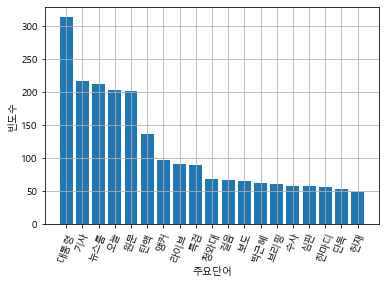

In [22]:
wordInfo = main()

In [28]:
sorted(wordInfo, key=lambda x : wordInfo[x], reverse=True)
range(len(wordInfo))

range(0, 19)